# Pipeline

## Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

## Load data

- Extract mean grey values
- Extract std. dev. of grey values

In [44]:
# Dirpath as input
data_dir = 'data/raw/2024-05-17_E8-0/E4/precut/'
csv_file = '240517_GCaMP_E8.0_Exp3_E4_x20_320cyc_precut_mid._t3_ls10_stage-1-30.58.csv'

# Define name of dir for all outputs
output_dir = data_dir.replace('raw', 'processed')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_dir

'data/processed/2024-05-17_E8-0/E4/precut/'

In [34]:
raw_data = pd.read_csv(data_dir + csv_file, index_col=0)
raw_data

,Area(LL),Mean(LL),StdDev(LL),Mode(LL),Min(LL),Max(LL),Median(LL),Area(LI),Mean(LI),StdDev(LI),...,Min(RI),Max(RI),Median(RI),Area(RL),Mean(RL),StdDev(RL),Mode(RL),Min(RL),Max(RL),Median(RL)
,,,,,,,,,,,,,,,,,,,,,
1,112.546,46.175,10.089,46,28,73,46,112.546,23.237,5.225,...,28,107,52,112.546,62.450,10.040,65,40,86,62
2,112.546,47.812,13.773,46,20,76,49,112.546,22.750,7.924,...,19,68,37,112.546,50.500,8.434,47,32,68,49
3,112.546,42.400,9.248,34,31,65,40,112.546,19.962,6.247,...,14,61,33,112.546,49.875,18.941,37,20,103,47
4,112.546,35.650,13.548,39,15,67,36,112.546,19.225,5.906,...,10,45,26,112.546,35.537,9.653,32,14,56,35
5,112.546,40.700,9.053,33,18,59,42,112.546,17.425,5.113,...,3,34,27,112.546,35.263,9.640,31,16,56,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,112.546,67.000,8.926,69,47,86,68,112.546,20.712,5.340,...,7,30,22,112.546,26.862,6.997,22,17,51,25
317,112.546,96.062,16.297,99,68,141,97,112.546,43.925,14.703,...,12,41,20,112.546,32.213,6.478,34,19,41,34
318,112.546,115.600,23.659,105,84,191,108,112.546,52.838,9.787,...,8,43,17,112.546,27.025,11.105,19,8,46,25


In [7]:
raw_data.columns

Index(['Area(LL)', 'Mean(LL)', 'StdDev(LL)', 'Mode(LL)', 'Min(LL)', 'Max(LL)',
       'Median(LL)', 'Area(LI)', 'Mean(LI)', 'StdDev(LI)', 'Mode(LI)',
       'Min(LI)', 'Max(LI)', 'Median(LI)', 'Area(LM)', 'Mean(LM)',
       'StdDev(LM)', 'Mode(LM)', 'Min(LM)', 'Max(LM)', 'Median(LM)',
       'Area(RM)', 'Mean(RM)', 'StdDev(RM)', 'Mode(RM)', 'Min(RM)', 'Max(RM)',
       'Median(RM)', 'Area(RI)', 'Mean(RI)', 'StdDev(RI)', 'Mode(RI)',
       'Min(RI)', 'Max(RI)', 'Median(RI)', 'Area(RL)', 'Mean(RL)',
       'StdDev(RL)', 'Mode(RL)', 'Min(RL)', 'Max(RL)', 'Median(RL)'],
      dtype='object')

## Extract absolute time

In [53]:
info = csv_file[:-4].split('-')[1:]
stage = int(info[0])
abs_time = float(info[1])
print(f'{stage = }')
print(f'{abs_time = }')

stage = 1
abs_time = 30.58


## Convert frame number to real time

In [59]:
num_frames = len(raw_data)
sec_per_frame = abs_time / num_frames
sec_per_frame

0.0955625

## Extract mean data

In [8]:
circle_means = raw_data.filter(regex='Mean')
circle_means

,Mean(LL),Mean(LI),Mean(LM),Mean(RM),Mean(RI),Mean(RL)
,,,,,,
1,46.175,23.237,30.775,27.225,55.175,62.450
2,47.812,22.750,29.087,27.925,38.125,50.500
3,42.400,19.962,23.413,29.112,33.162,49.875
4,35.650,19.225,24.425,22.650,26.413,35.537
5,40.700,17.425,17.650,22.225,23.950,35.263
...,...,...,...,...,...,...
316,67.000,20.712,14.700,15.100,20.837,26.862
317,96.062,43.925,27.150,14.863,21.525,32.213
318,115.600,52.838,43.025,19.575,17.538,27.025


## Normalise data

$
x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
$

In [9]:
def norm_df(df):
    return (df-df.min())/(df.max()-df.min())

In [10]:
norm_data = norm_df(circle_means)
norm_data

,Mean(LL),Mean(LI),Mean(LM),Mean(RM),Mean(RI),Mean(RL)
,,,,,,
1,0.130792,0.204068,0.348808,0.295864,0.459359,0.386029
2,0.148147,0.195054,0.315799,0.310710,0.260641,0.262564
3,0.090771,0.143449,0.204842,0.335885,0.202797,0.256106
4,0.019210,0.129808,0.224632,0.198834,0.124138,0.107968
5,0.072748,0.096491,0.092145,0.189820,0.095431,0.105137
...,...,...,...,...,...,...
316,0.351572,0.157332,0.034456,0.038706,0.059149,0.018339
317,0.659677,0.586995,0.277920,0.033680,0.067168,0.073625
318,0.866812,0.751971,0.588361,0.133616,0.020699,0.020023


## Plot real time vs fluorosence intensity

Plot all three circles on the same graph

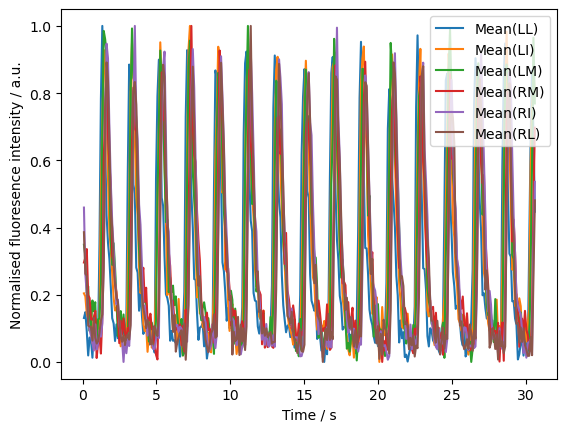

In [65]:
fig, ax = plt.subplots()

for col in norm_data:
    x = norm_data[col].index * sec_per_frame
    y = norm_data[col].values
    ax.plot(x, y, label=col)

ax.set_xlabel('Time / s')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend()
plt.show()

## Peak finding

### Calculate beat frequency

- Add functionality to define time window, default = all time

Peaks found (index) = [ 15  34  54  75  95 116 137 157 178 198 218 238 258 279 299]
Peaks found (frame number) = [ 16  35  55  76  96 117 138 158 179 199 219 239 259 280 300]


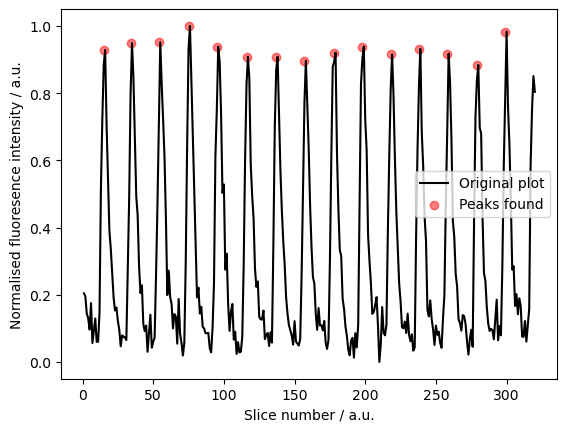

In [67]:
height = 150
prominence = 0.5
distance = 4

mean_LI = norm_data['Mean(LI)']

peaks, info = find_peaks(
    x=mean_LI,
    prominence=prominence,
)

x = list(range(1, len(mean_LI)+1))
y = mean_LI

print(f'Peaks found (index) = {peaks}')
print(f'Peaks found (frame number) = {np.array(x)[peaks]}')

fig, ax = plt.subplots()

ax.plot(x, y, c='k', label='Original plot')
ax.scatter(peaks, np.array(y)[peaks], c='red', alpha=0.5, label='Peaks found')

ax.set_xlabel('Slice number / a.u.')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend()
plt.show()

Hz = $s^{-1}$

In [76]:
num_peaks = len(peaks)
print(f'Number of peaks found = {num_peaks}')
L_freq = num_peaks / abs_time
print(f'{L_freq = } Hz')

Number of peaks found = 15
L_freq = 0.4905166775670373 Hz


### Mean Frequency and/or mean peak-to-peak interval + SD

### $t_{1/2}$ (time to reach 0.5 normalised intensity) for each ROI

- Up wave: odd-numbered columns
- Down wave: even-numbered columns
- Average $t_{1/2}$ values
- `if y == 0.5`

### Write results to CSV

- Add columns that specifiy whether pre-cut, post-cut etc.